In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [73]:
input_file = 'income_data.txt'

In [75]:
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000


In [77]:
with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break

        if '?' in line:
            continue

        data = line[:-1].split(',')
        # print(data)

        if data[-1] == ' <=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1

        if data[-1] == ' >50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1

In [79]:
X = np.array(X)

In [81]:
label_encoder = []
X_encoded = np.empty(X.shape)
for i, item in enumerate(X[0]):
    if item.isdigit():
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

In [83]:
notlinclas = {
    'Poly SVM (degree=3)': SVC(kernel='poly', degree=3, random_state=0),
    'Linear SVM': LinearSVC(random_state=0),
    'RBF SVM': SVC(kernel='rbf', random_state=0),
    'Sigmoid SVM': SVC(kernel='sigmoid', random_state=0)
}

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [87]:
for notlinclas1 in notlinclas.items():
    print(f'\nКласифікатори: {notlinclas1[0]}')
    clf = OneVsRestClassifier(notlinclas1[1])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    
    accur = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f'Акуратність: {accur*100:.2f}%')
    print(f'Точність: {precision*100:.2f}%')
    print(f'Повнота: {recall*100:.2f}%')
    print(f'F1: {f1*100:.2f}%')
    print('-' * 40)


Класифікатори: Poly SVM (degree=3)
Акуратність: 74.64%
Точність: 55.71%
Повнота: 74.64%
F1: 63.80%
----------------------------------------

Класифікатори: Linear SVM


C:\Users\Mariia\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Mariia\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Акуратність: 78.30%
Точність: 77.13%
Повнота: 78.30%
F1: 73.93%
----------------------------------------

Класифікатори: RBF SVM
Акуратність: 74.64%
Точність: 55.71%
Повнота: 74.64%
F1: 63.80%
----------------------------------------

Класифікатори: Sigmoid SVM
Акуратність: 63.82%
Точність: 63.56%
Повнота: 63.82%
F1: 63.68%
----------------------------------------


In [89]:
input_data = ['37', ' Private', ' 215646', ' HS-grad', ' 9', ' Never-married', ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', ' 0', ' 0', ' 40', ' United-States']


In [91]:
input_data_encoded = [-1] * len(input_data)
count = 0
for i, item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(item)
    else:
        input_data_encoded[i] = label_encoder[count].transform([item])[0]
        count += 1

input_data_encoded = np.array(input_data_encoded).reshape(1, -1)

In [93]:
for notlinclas1 in notlinclas.values():
    print(f'\nКласифікатори: {notlinclas1.__class__.__name__}')
    notlinclas1.fit(X, y)
    pred_class = notlinclas1.predict(input_data_encoded)
    print(label_encoder[-1].inverse_transform(pred_class)[0])
    print('-' * 40)
    


Класифікатори: SVC
 <=50K
----------------------------------------

Класифікатори: LinearSVC


C:\Users\Mariia\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Mariia\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


 <=50K
----------------------------------------

Класифікатори: SVC
 <=50K
----------------------------------------

Класифікатори: SVC
 <=50K
----------------------------------------


In [97]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [99]:
models = {
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [101]:
scores = {}
for name, model in models.items():
    score = cross_val_score(model, X, y, cv=5).mean()
    scores[name] = score
    print(f"{name}: {score:.4f}")

SVM: 0.7511


C:\Users\Mariia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mariia\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Logistic Regression: 0.7816
Random Forest: 0.8482
K-Nearest Neighbors: 0.7478



Найкраща модель: Random Forest з точністю 0.8482


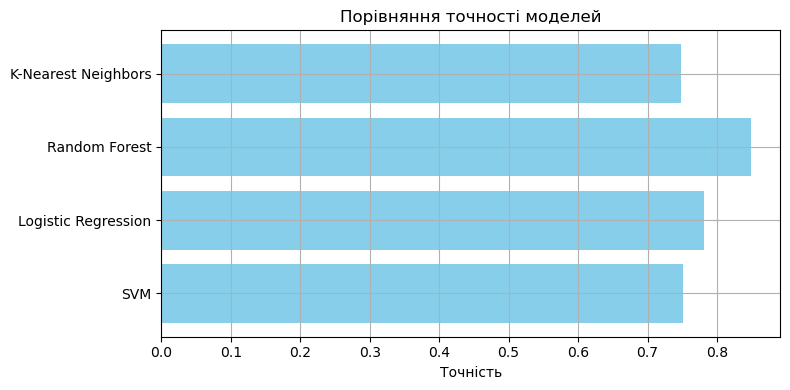

In [102]:
# Визначаємо найкращу модель
best_model = max(scores, key=scores.get)
print(f"\nНайкраща модель: {best_model} з точністю {scores[best_model]:.4f}")

# Побудова графіка
plt.figure(figsize=(8, 4))
plt.barh(list(scores.keys()), list(scores.values()), color='skyblue')
plt.xlabel("Точність")
plt.title("Порівняння точності моделей")
plt.grid(True)
plt.tight_layout()
plt.show()